# Importing Required Libraries

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [138]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r"C:\Users\tiwar\OneDrive\Desktop\Pandas Datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [139]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [140]:
df.shape

(7043, 21)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [142]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [143]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# infrance
- Hence there is no null values present in data we will proceed to EDA

# Customer Demographics

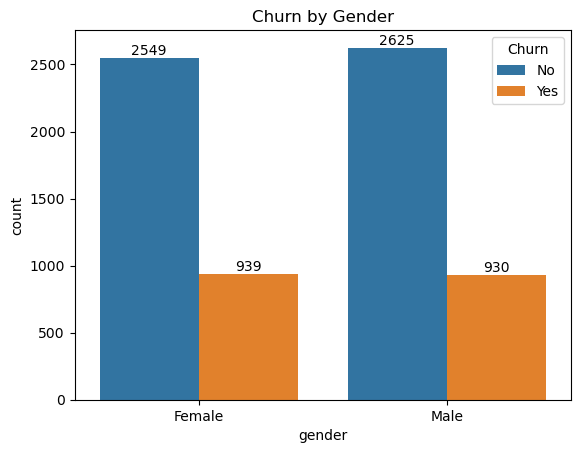

In [144]:
# Distribution of churn across Genders
plt.title('Churn by Gender')
ax=sns.countplot(x='gender',hue='Churn',data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [145]:
# Using Pivot
df.pivot_table(index='gender',columns='Churn',aggfunc='size',fill_value=0)

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


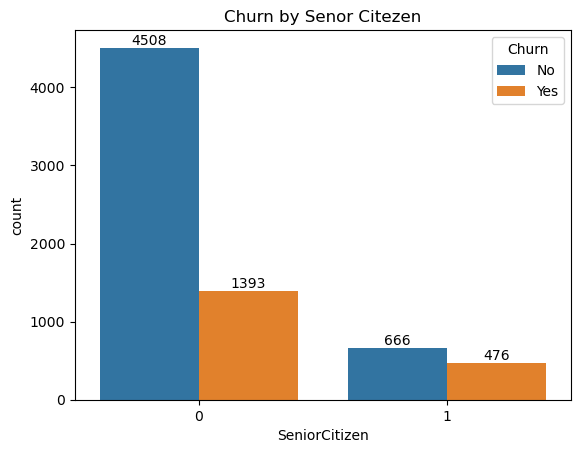

In [146]:
# Churn by senior Citizen
plt.title('Churn by Senor Citezen')
ax=sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [147]:
df.pivot_table(index='SeniorCitizen',columns='Churn',aggfunc='size',fill_value=0)

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


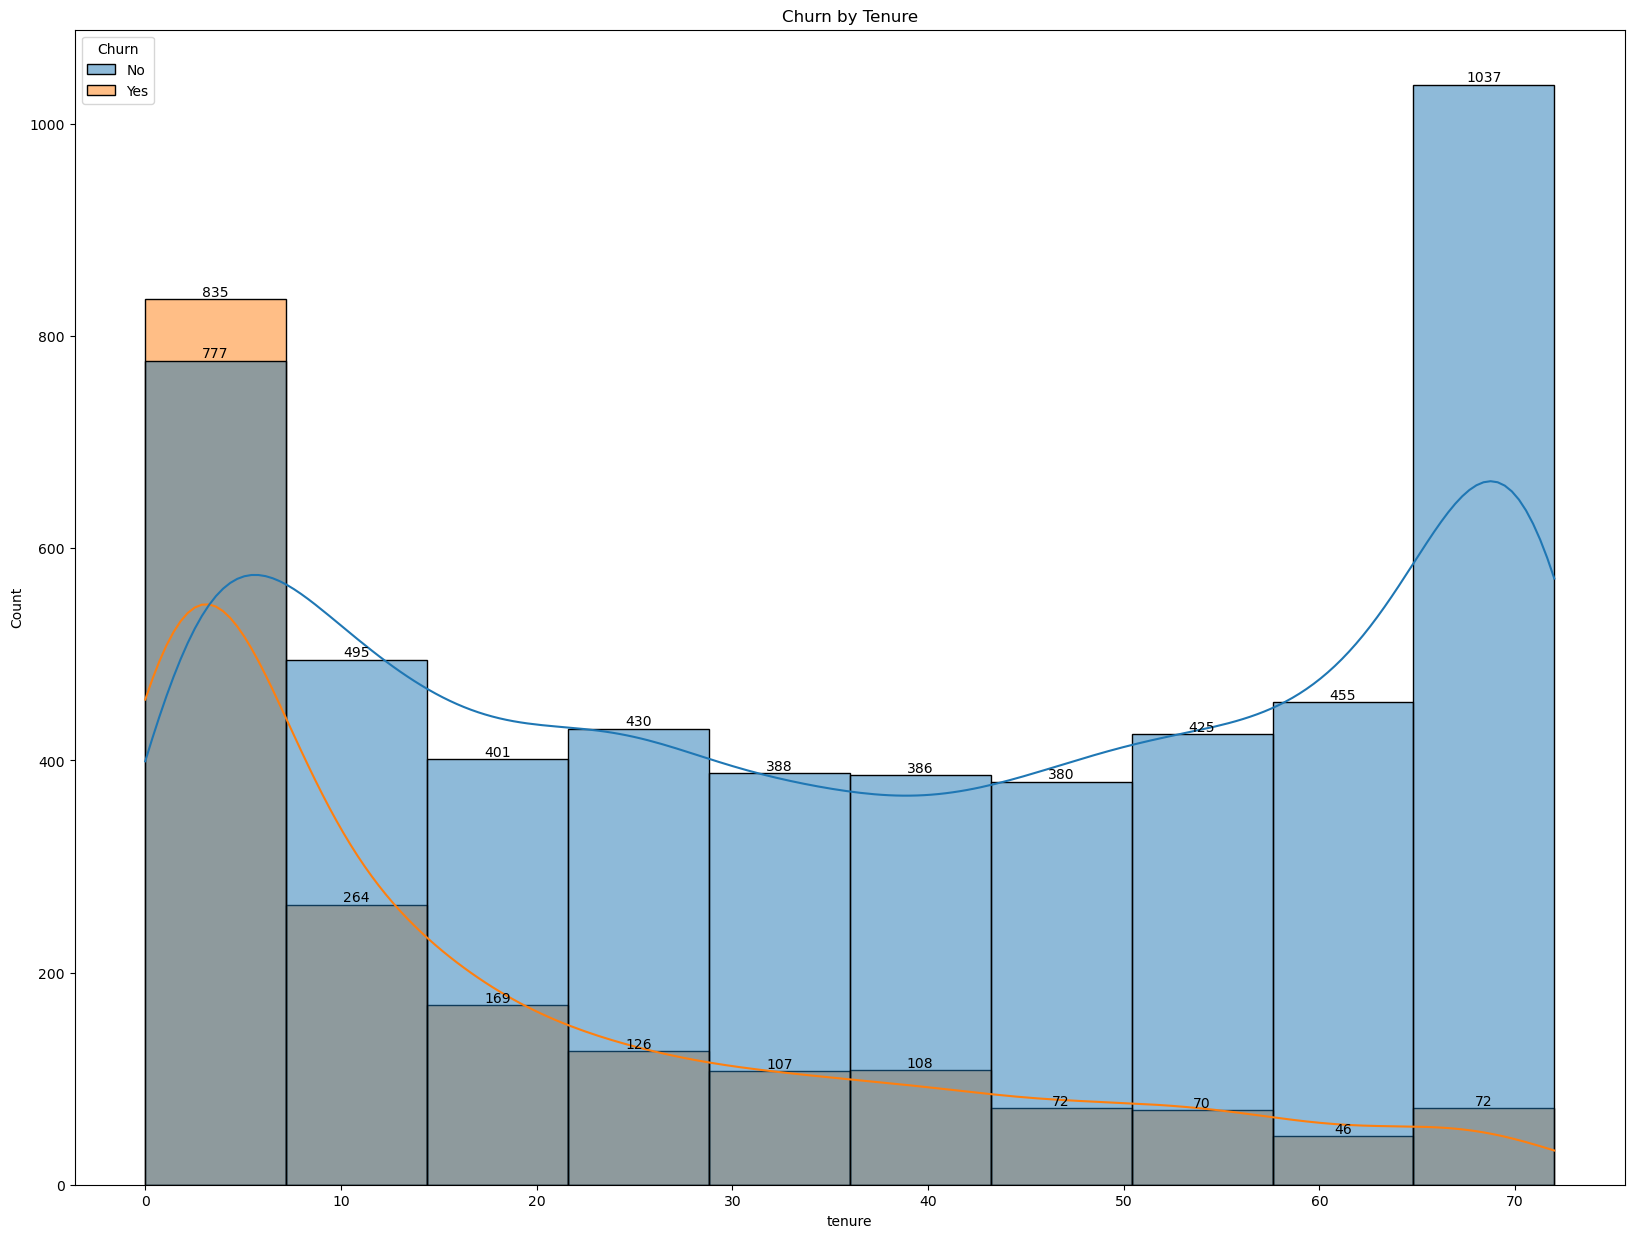

In [148]:
# Churn by tenure
plt.figure(figsize=(20,15))
plt.title('Churn by Tenure')
ax=sns.histplot(x='tenure',data=df,hue='Churn',bins=10,kde=True)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

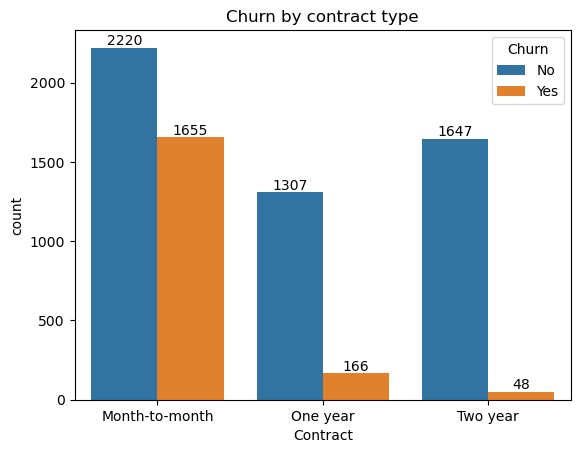

In [149]:
# Churn by contract type
plt.title('Churn by contract type')
ax=sns.countplot(data=df,x='Contract',hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

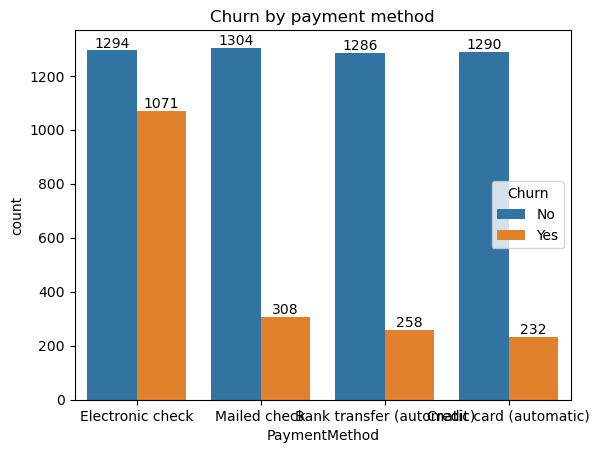

In [150]:
# Churn by payment method
plt.title('Churn by payment method')
ax=sns.countplot(data=df,x='PaymentMethod',hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

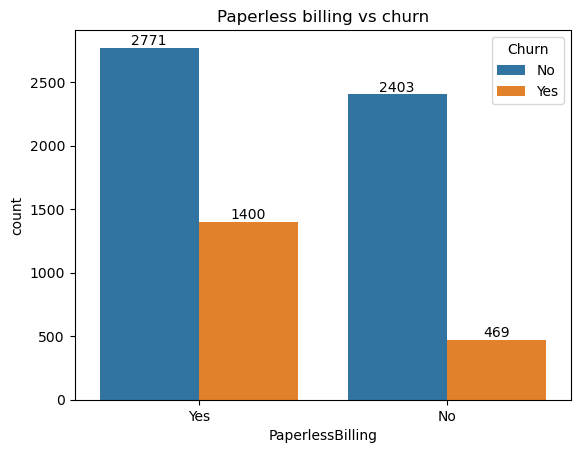

In [151]:
# Paperless Binning
plt.title('Paperless billing vs churn')
ax=sns.countplot(data=df,x='PaperlessBilling',hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

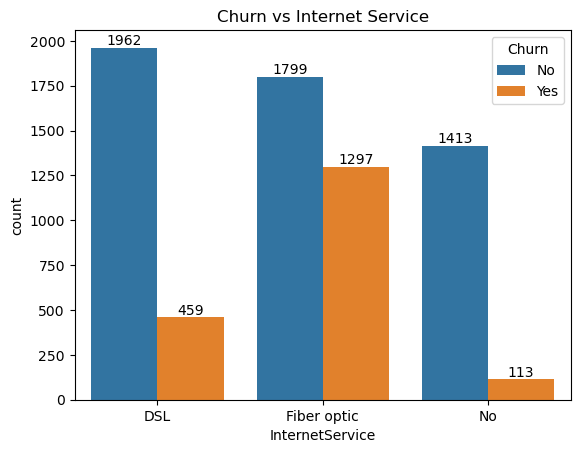

In [152]:
# Churn vs internet Service
ax=sns.countplot(data=df,x='InternetService',hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn vs Internet Service')
plt.show()

In [153]:
# Churn by number of services
df.columns[6:-6]

Index(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')

In [154]:
services=['PhoneService', 'MultipleLines','OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

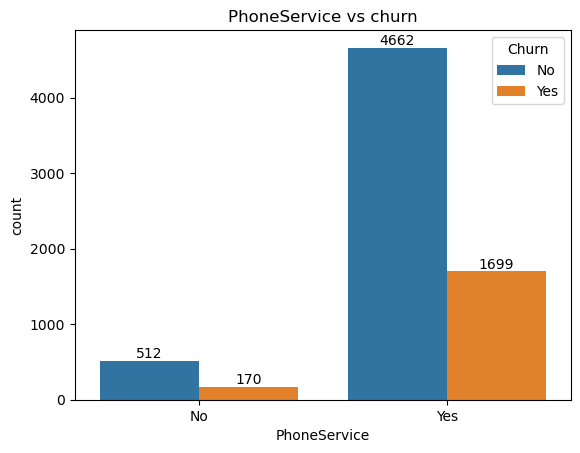

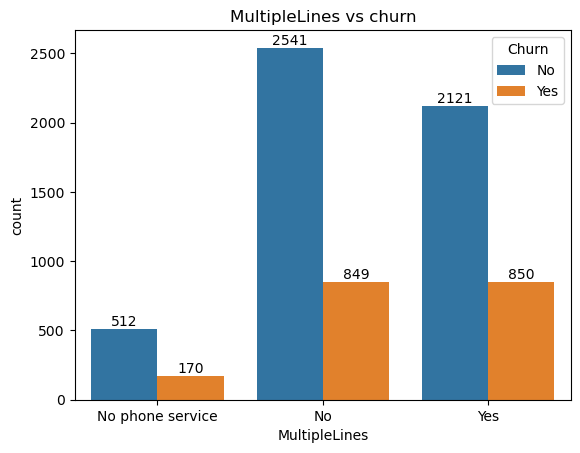

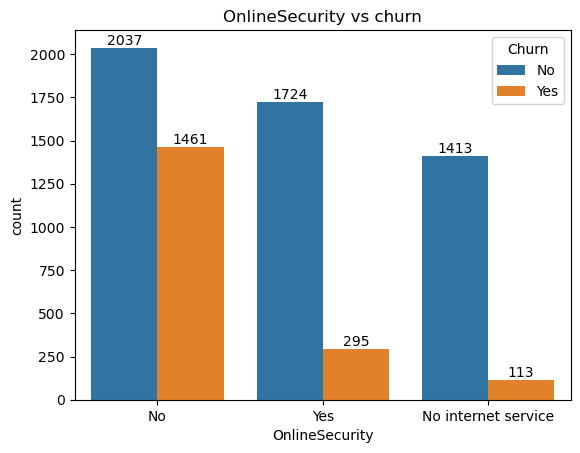

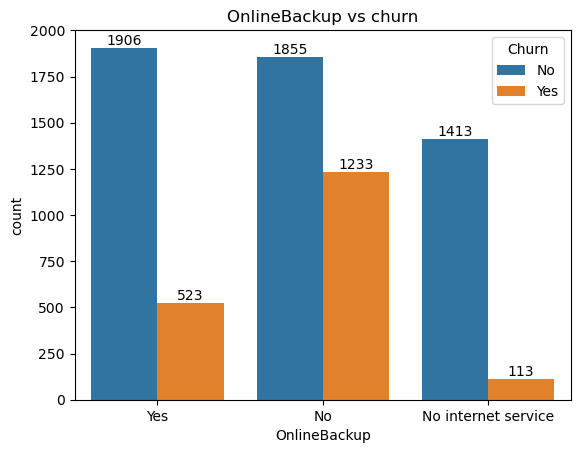

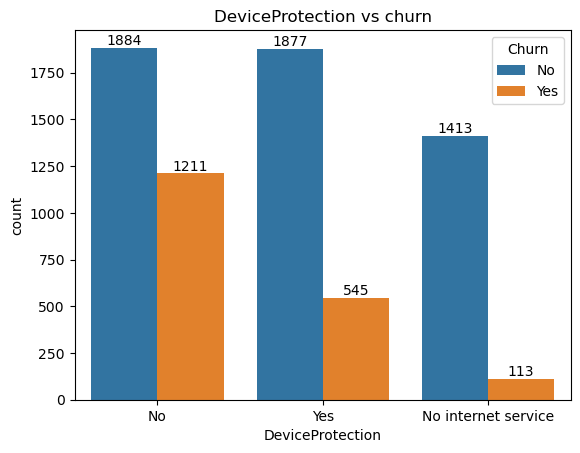

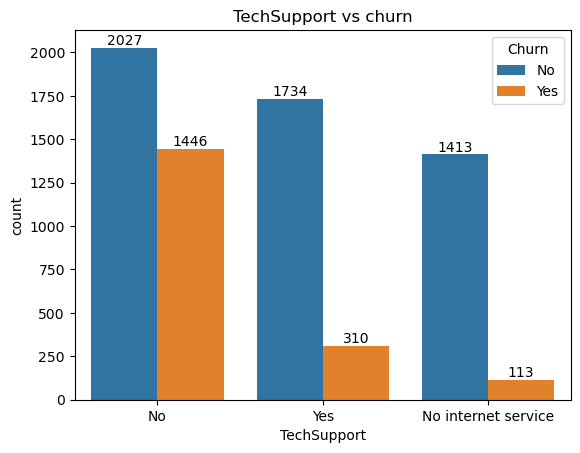

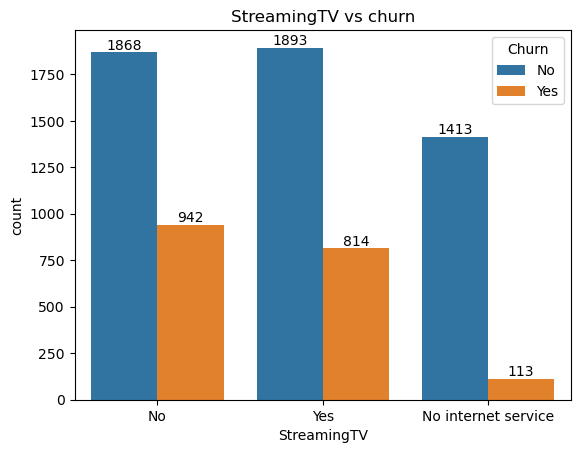

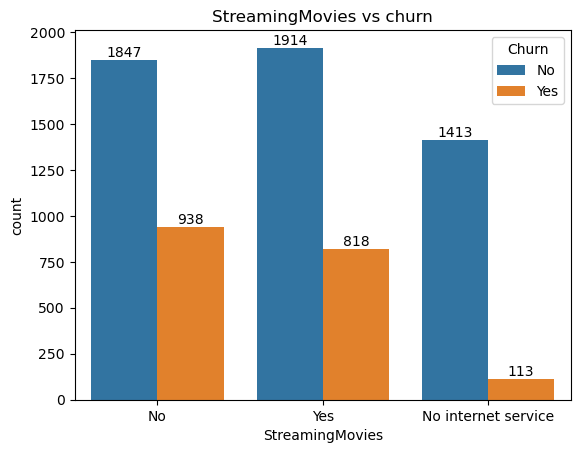

In [155]:
for service in services:
    ax=sns.countplot(x=service,hue='Churn',data=df)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title(f'{service} vs churn')
    plt.show()

In [156]:
# Monthly charges distribution
sns.kdeplot(data=df,x='MonthlyCharges',hue='Churn',ax=ax)


<Axes: title={'center': 'StreamingMovies vs churn'}, xlabel='StreamingMovies', ylabel='count'>

In [157]:
X=df.drop(columns=['Churn','customerID'])

In [158]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a label encoder object
le = LabelEncoder()

# Assuming X is a DataFrame with multiple columns
# We need to apply LabelEncoder to each categorical column separately
X_encoded = X.copy()  # Create a copy to avoid modifying the original data

# Loop through each column that needs encoding
for column in X.select_dtypes(include=['object']).columns:  # Only encode object/categorical columns
    X_encoded[column] = le.fit_transform(X[column])

# If X is a numpy array instead of DataFrame, you would need to do:
# X_encoded = X.copy()
# for i in range(X.shape[1]):
#     if X[:, i].dtype == 'object' or pd.Series(X[:, i]).dtype == 'object':
#         X_encoded[:, i] = le.fit_transform(X[:, i])

In [159]:
y=df['Churn']

# Model training usig RFC

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y, test_size=0.2, stratify=y, random_state=41)

In [161]:
RF_model=RandomForestClassifier()

In [162]:
RF_model.fit(X_train,y_train)

RandomForestClassifier()

In [163]:
RF_model.score(X_test,y_test)

0.7835344215755855

# Model Tuening

In [164]:
RF_model = RandomForestClassifier()
params = {'n_estimators': [100, 200, 300, 500],
          'max_depth': [None,2,4,6,8,10],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'max_features': ['auto', 'sqrt', 'log2'],
          'bootstrap': [True, False]}
rsearch_model = RandomizedSearchCV(estimator=RF_model, param_distributions=params, n_iter=50, cv=5, random_state=42, n_jobs=-1)
rsearch_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42)

# Final Model after Randomized Search CV

In [165]:
RF_model=RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,n_estimators=300)
RF_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300)

In [166]:
#Training Score
RF_model.score(X_train,y_train)

0.8615548455804047

In [167]:
#Testing Score
RF_model.score(X_test,y_test)

0.808374733853797

In [168]:
y_pred=RF_model.predict(X_test)

In [172]:
pd.DataFrame(classification_report(y_test,y_pred)).T

ValueError: DataFrame constructor not properly called!

In [170]:
y_test.shape

(1409,)

In [171]:
y_pred.shape

(1409,)